###  <font color=red>Working with MNIST Dataset</font> ###

## **MNIST dataset consists of 70,000 images of digits handwritten by students and employees of US Census Bureau.**

You are supposed to perform a binary classification task, separating digit 4 from others (0,1,2,3,5,6,7,8,9). The data could be downloaded using the code below:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB

In [ ]:
# This will take less than a minute to run.

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### <font color=green>1:</font> ###

__In the first step, you are going to get acquainted with the dataset.__

Randomly, plot three digits from the dataset.

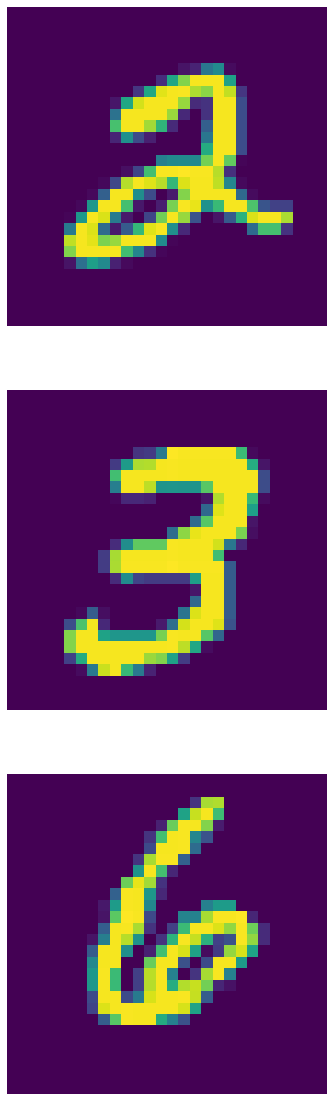

In [ ]:
digits = np.array(random.sample(list(np.unique(y)),3))
M = 1
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(digits), M, figsize=(20,20))

for i,d in enumerate(digits):
    for j in range(M):
        axs[i].imshow(X[y==d][j].reshape((dim,dim)))
        axs[i].axis('off')


### <font color=green>2:</font> ###
__In the second step, you should build your dataset. Do as follows:__
* Split your training and testing dataset (80% and 20%).
* Set the random_state to 10.
* As your goal is to identify digit 4, create the target vectors for this classification task  <font color=red>(note that you are training a binary classifier)</font>

In [ ]:
y = label_binarize(y, classes=np.unique(y))[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### <font color=green>3:</font> ###
__Do the classification task using a <font color=red>Gaussian Naive Bayes Classifier</font>__

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

### <font color=green>4:</font> ###
__Calculate the following values:__
* Confusion Matrix
* Accuracy
* Sensitivity
* Specificity
* Precision
* Recall

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_test, y_pred, labels=np.unique(y_test)))

              precision    recall  f1-score   support

           0       0.99      0.34      0.51     12609
           1       0.14      0.98      0.25      1391

    accuracy                           0.40     14000
   macro avg       0.57      0.66      0.38     14000
weighted avg       0.91      0.40      0.48     14000



in the classification report above recall of the positive class is also known as sensitivity and recall of the negative class is specificity.

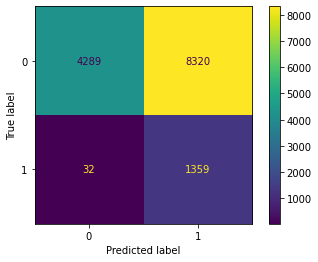

In [ ]:
plot_confusion_matrix(nb, X_test, y_test)

### <font color=green>5:</font> ###
__Now plot <font color=red>the ROC curve</font>, then calculate <font color=red>Area Under ROC (AUROC)</font>__

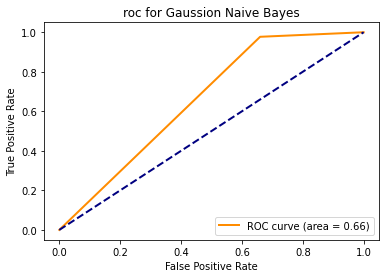

In [ ]:
from sklearn.metrics import auc , roc_curve

# roc_curve(y_test, y_pred)
def plot_roc(y_test, y_score, classifier_type = 'Gaussion Naive Bayes'):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('roc for '+ classifier_type)
    plt.legend(loc="lower right")
    plt.show()

plot_roc(y_test, y_pred)

### <font color=green>6:</font> ###
__Finally, apply a 5-fold cross validation, and report your <font color=red>mean and std values</font>.__

In [ ]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(nb, X, y)
print(f'mean : {np.mean(res)}\tvar : {np.std(res)}')

mean : 0.38312857142857143	var : 0.018205986904962713


### <font color=green>7:</font> ###
__How are your results?__

__Is <font color=red>Gaussian Naive Bayes Classifier</font> a good one for this problem?__

No. Gaussian Naive Bayes classifier recived on average accuracy of 40 percents and predicted many of other numbers as number **4**.

### __Repeat all the steps using <font color=green>Nearest Centroid Classifier</font> and <font color=green>Logistic Regression Classifier</font>.__ ### 
* You just need to make some changes to step 3!
* You should report all the values in steps 4, 5, and 6

### Nearest Centroid Classifier

In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

In [ ]:
nc = NearestCentroid()

nc.fit(X_train, y_train)

nc_pred = nc.predict(X_test)

In [ ]:
print("classification report for nearest centroid\n",classification_report(y_test, y_pred, labels=np.unique(y_test)))

classification report for nearest centroid
               precision    recall  f1-score   support

           0       0.99      0.34      0.51     12609
           1       0.14      0.98      0.25      1391

    accuracy                           0.40     14000
   macro avg       0.57      0.66      0.38     14000
weighted avg       0.91      0.40      0.48     14000



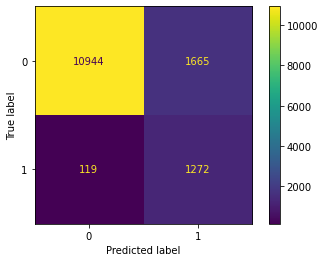

In [ ]:
plot_confusion_matrix(nc, X_test, y_test)

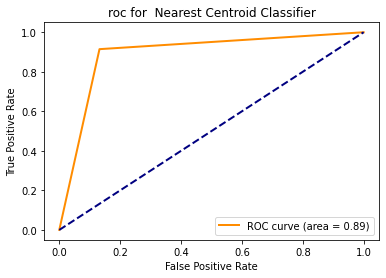

In [ ]:
plot_roc(y_test, nc_pred, " Nearest Centroid Classifier")

### Logistic Regression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

/home/rastadayon/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("classification report for logistic regression\n",classification_report(y_test, y_pred, labels=np.unique(y_test)))

classification report for logistic regression
               precision    recall  f1-score   support

           0       0.99      0.34      0.51     12609
           1       0.14      0.98      0.25      1391

    accuracy                           0.40     14000
   macro avg       0.57      0.66      0.38     14000
weighted avg       0.91      0.40      0.48     14000



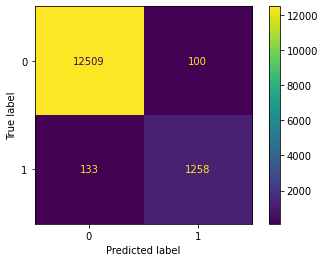

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)

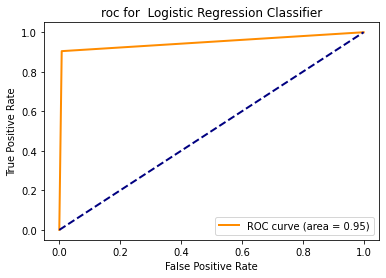

In [ ]:
plot_roc(y_test, lr_pred, " Logistic Regression Classifier")

### Which one is better?  ###

None of the above classifiers recieved good accuracies. To see which is better depends on which of the precision or recall values are more important. If not classifying other numbers as number 4 is more important then Logistic regression is a better classifier. If number of correctly classified number 4s is most important then naive bayes classifier is slightly better. Overall logistic regression did a better job even though it did not do very good.

_________________________________________________________